# Session 1a - Regression

In [270]:
%pylab inline

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sklearn
import IPython
import platform
    
print ('Python version:', platform.python_version())
print ('IPython version:', IPython.__version__)
print ('numpy version:', np.__version__)
print ('scikit-learn version:', sklearn.__version__)
print ('matplotlib version:', matplotlib.__version__)

Populating the interactive namespace from numpy and matplotlib
Python version: 3.6.3
IPython version: 6.2.1
numpy version: 1.13.3
scikit-learn version: 0.19.1
matplotlib version: 2.1.0


In [271]:
def my_linear_regression(xs,ys, n_iter=1000):
    N = len(xs)
    m = 0.0
    b = 0.0
    learning_rate_alpha = 0.001
    
    for i in range(n_iter):
        cost = 0
        y_hats = []
        for x in xs:
            y_hats.append( b + m*x )
        
        for x,y,y_hat in zip(xs,ys,y_hats):
            cost += (y_hat- y)**2
        if i % 100 == 0:
            print("cost at iteration {} = {}".format(i,cost))

        del_m = 0.0
        del_b = 0.0    
        for x,y,y_hat in zip(xs,ys,y_hats):  
            del_m += (2/N)*( x * (y_hat - y) )
            del_b += (2/N)*( y_hat - y )
            
        m = m - learning_rate_alpha * del_m
        b = b - learning_rate_alpha * del_b
    return y_hats, m, b, cost

In [272]:
from sklearn import datasets
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target

scaler = preprocessing.StandardScaler()

iris_sepal = X_iris[:,0:2]
# iris_sepal = scaler.fit_transform(iris_sepal)
# iris_petal = X_iris[:,2:4]

setosa_sepal =iris_sepal[y_iris == 0]
# setosa_petal =iris_petal[y_iris == 0]

setosa_sepal_l = preprocessing.scale(setosa_sepal[:,0].reshape(-1,1))
setosa_sepal_w = preprocessing.scale(setosa_sepal[:,1].reshape(-1,1))

from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(setosa_sepal_l, setosa_sepal_w)

pred = reg.predict(setosa_sepal_l)
print(pred[0:5])
print(setosa_sepal_w[0:5])

[[ 0.2012]
 [-0.2269]
 [-0.6549]
 [-0.8689]
 [-0.0128]]
[[ 0.2174]
 [-1.1082]
 [-0.578 ]
 [-0.8431]
 [ 0.4825]]


cost at iteration 0 = [ 50.]
cost at iteration 100 = [ 40.7997]
cost at iteration 200 = [ 34.635]
cost at iteration 300 = [ 30.5044]
cost at iteration 400 = [ 27.7366]
cost at iteration 500 = [ 25.8821]
cost at iteration 600 = [ 24.6395]
cost at iteration 700 = [ 23.8068]
cost at iteration 800 = [ 23.2489]
cost at iteration 900 = [ 22.8751]
m= [ 0.6459] b= [ -4.8907e-17]
cost= [ 22.6267]


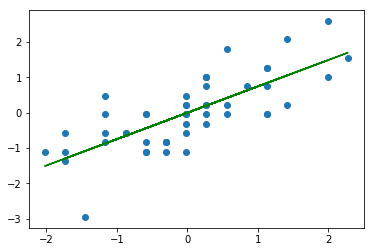

In [273]:
diy_predictions, m, b, cost = my_linear_regression(setosa_sepal_l, setosa_sepal_w)
print("m=",m,"b=",b)
print("cost=",cost)

plt.scatter(setosa_sepal_l, setosa_sepal_w)
plt.plot(setosa_sepal_l,y_hats, color="green")
plt.show()

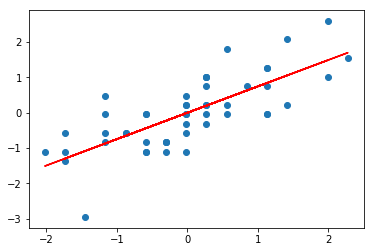

In [274]:
pred = reg.predict(setosa_sepal_l)

plt.scatter(setosa_sepal_l, setosa_sepal_w)
# plot the regression line (should match our DIY routine)
plt.plot(setosa_sepal_l, pred, color="red")

## Multivariate linear regression

To demonstrate multivariate regression in scikit-learn, we will apply it to a (very) simple and well-know problem: trying to predict the price of a house given some of its characteristics. As the dataset, we will use the 1978 Boston house price dataset (find the dataset description and attributes [here](http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html)).

In [275]:
from sklearn.datasets import load_boston
from sklearn import preprocessing
boston = load_boston()
print ('Boston dataset shape:{}'.format(boston.data.shape))
print ('Boston target shape:{}'.format(boston.target.shape))
print (boston.feature_names)


X_train_boston_raw=boston.data
y_train_boston_raw=boston.target

numpy.set_printoptions(precision=4)
print("features:\n", X_train_boston_raw[0:3,:])
print("prices:\n", y_train_boston_raw[0:3])

X_train_boston = preprocessing.scale(X_train_boston_raw) # shortcut to preprocessing.StandardScaler()
y_train_boston = preprocessing.scale(y_train_boston_raw)

Boston dataset shape:(506, 13)
Boston target shape:(506,)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
features:
 [[  6.3200e-03   1.8000e+01   2.3100e+00   0.0000e+00   5.3800e-01
    6.5750e+00   6.5200e+01   4.0900e+00   1.0000e+00   2.9600e+02
    1.5300e+01   3.9690e+02   4.9800e+00]
 [  2.7310e-02   0.0000e+00   7.0700e+00   0.0000e+00   4.6900e-01
    6.4210e+00   7.8900e+01   4.9671e+00   2.0000e+00   2.4200e+02
    1.7800e+01   3.9690e+02   9.1400e+00]
 [  2.7290e-02   0.0000e+00   7.0700e+00   0.0000e+00   4.6900e-01
    7.1850e+00   6.1100e+01   4.9671e+00   2.0000e+00   2.4200e+02
    1.7800e+01   3.9283e+02   4.0300e+00]]
prices:
 [ 24.   21.6  34.7]


## Training using n-fold cross-validation

Previously we've trained using a dataset split into train and test subsets.  Another way to split your data is to use cross validation.

One of the main advantages of cross-validation is reducing the variance of the evaluation measures.  When you split the data manually, you will find that for each different split, your algorithm's performance will vary.  How do you know what is the right score?

Evaluation within machine learning generally assumes that the distribution of classes on your training and testing sets are similar. If not, you may get results that are not a truthful measure of the classifier's performance. Cross-validation lets us mitigate this: we are averaging on k different models built on k different datasets, so we are reducing variance and probably producing more realistic performance scores for our models.

Another benefit of cross-validation is that it allows us to make good use of the data we have available - each example acts as both a training datapoint and as a validation datapoint.

In [277]:
def train_and_evaluate(_clf, X_train, y_train, n_folds):
    _clf.fit(X_train, y_train)
    print ('Score on training set: {:.2f}'.format(_clf.score(X_train, y_train)))
    #create a k-fold cross validation iterator of k=5 folds
    data =X_train.shape[0]
    cv = sklearn.model_selection.KFold(n_splits= n_folds, shuffle=True, random_state=42)
    scores = sklearn.model_selection.cross_val_score(_clf, X_train, y_train, cv=cv)
    print ('Average score using {}-fold crossvalidation:{:.2f}'.format(n_folds,np.mean(scores)))
    return _clf

For classification, we used accuracy, the proportion of correctly classified test-instances, to summarise our method’s performance.

For regression, accuracy is a bad idea: we are predicting real values, so it's almost impossible to exactly predict the true value.

Instead, the default score function in scikit-learn is the coefficient of determination (or $R^2$ score), which measures the proportion of outcome variation explained by the model. $R^2 \in [0,1]$, and reaches 1 when the model perfectly predicts all the target values.

In [278]:
from sklearn import linear_model

#Use a Stochastic Gradient Descent Regressor - this is a general purpose linear regressor good for large datasets
clf_sgd = linear_model.SGDRegressor(loss='squared_loss', penalty=None, random_state=42, max_iter=10e5, tol=1e-4)
train_and_evaluate(clf_sgd, X_train_boston, y_train_boston, 5)

#print the hyperplane coefficients and their sum-of-squares

print(clf_sgd.coef_)
print(np.sum(np.square(clf_sgd.coef_)))

Score on training set: 0.74
Average score using 5-fold crossvalidation:0.71
[-0.0898  0.0905 -0.0318  0.08   -0.1731  0.3157 -0.0126 -0.2974  0.1576
 -0.0956 -0.2109  0.0989 -0.3975]
0.488099516178


In [279]:
clf_sgd2 = linear_model.SGDRegressor(loss='squared_loss', penalty="l2", random_state=42, max_iter=10e5, tol=1e-4)
train_and_evaluate(clf_sgd2, X_train_boston, y_train_boston, 5)
print(clf_sgd2.coef_)
print(np.sum(np.square(clf_sgd2.coef_)), "<-- coefficients should be a bit smaller")

Score on training set: 0.74
Average score using 5-fold crossvalidation:0.71
[-0.0897  0.0904 -0.0318  0.08   -0.173   0.3157 -0.0126 -0.2973  0.1575
 -0.0956 -0.2109  0.0989 -0.3974]
0.487942944467 <-- coefficients should be a bit smaller


For classification, we used accuracy, the proportion of correctly classified test-instances, to summarise our method’s performance.

For regression, accuracy is less useful: we are predicting continuous values, so it's virtually impossible to exactly predict the true value.

Instead, the default score function in scikit-learn is the _coefficient of determination_ (or $R^2$ score), which measures the proportion of outcome variation explained by the model. $R^2 \in [0,1]$, and reaches 1 when the model perfectly predicts all the target values.

## Extra
Use a _non-linear_ regressor such as sklearn's SVR, and cross validate it on the Boston data.  Is it better?  If so, why might this be?

## Summary
- We implemented linear regression using our own routine and using the sklearn libraries.
- We tried out multivariate regression on the Boston house price dataset, using k-fold cross validation to test our estimators
- We looked at the effect of regularisation on a SGD linear regressor